In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

# Summary

In 2004 the EDELWEISS collaboration published a paper detailing the resolution of their germanium detectors and also the width of their electron and nuclear recoil bands [[EDW2004][EDW2004]]. With detailed resolution information for these heat and ionization detectors it is possible to extract information on the ionization variance (effective Fano factor) in germanium. 

We focus on their model for detector GGA3, for which all of the constants needed for their parametrization of the measured band widths are given.

This notebook (1) defines the resoultion functions used by EDELWEISS and (2) reproduces EDELWEISS plots to convince the reader this interpretation is correct.

[EDW2004]: https://doi.org/10.1016/j.nima.2004.04.218 "EDELWEISS 2004 resolution paper"

# Band Widths

Specifically, the clearest place to measure the intrinsic ionization variation caused by the effective Fano factor in a detector with heat and ionization measurement is in the width of the measured ionization yield for nuclear recoils. The nuclear recoil "band" will be wider than is expected based on the ionization resolution alone (typically measured with electron recoils) due to the intrinsic additional ionization variance for nuclear recoils. We use the same variable names as in the EDELWEISS publication, reproduced in the following table.

variable/constant name|Description 
:-|:-
$\langle Q_n \rangle$|measured average ionization yield for nuclear recoils (other authors sometimes this "Y")
$\sigma_{Q_n}$ |nuclear recoil ionization yield 1-sigma width
$\sigma_{Q_{\gamma}}$| electron recoil ionization yield 1-sigma width
$\sigma_I$ | ionization resolution in keV
$\sigma_H$ | heat resolution in keV
$\tilde{E}_r$|measured recoil energy
$E_r$ | true recoil energy
$\epsilon_{\gamma}$ | average energy to create a single electron-hole pair for an electron-recoil in keV (taken to be 3 eV for germanium)
$V$ |voltage across the detector in Volts
F | effective Fano factor for nuclear-recoils

EDELWEISS saw a larger than expected nuclear recoil band width and  therefore parametrized their band widths for all detectors (see eqns 9, 10, and 11 from the above paper) as follows:  

$$\sigma_{Q\gamma}(E_r) = \frac{1 + V/\epsilon_{\gamma}}{E_r}\sqrt{\sigma_I^2 + \sigma_H^2},$$

and

$$\sigma_{Qn}(E_r) = \sqrt{C^2 + \frac{1}{E_r^2} \left( \left(1+\frac{V}{\epsilon_{\gamma}}\langle Q_n\rangle\right)^2\sigma_I^2 + \left( 1+\frac{V}{\epsilon_{\gamma}}\right)^2\langle Q_n\rangle^2\sigma_H^2\right)},$$

where $C$ is a fitted constant that empirically widens the nuclear recoil band to account for the additional ionization variance for nuclear recoils compared with electron recoils. In the EDELWEISS paper that additional variance seems to be recoil-energy independent and is modeled that way because $C$ is independent of the recoil energy. 

$\epsilon$ is the average energy needed to create a single electron-hole pair in germanium (3 eV); and $\langle Q_n \rangle$, $\sigma_I^2$, and $\sigma_H^2$ are all functions of the true recoil energy $E_R$. The yield $\langle Q_n \rangle = 0.16 E_R^{0.18}$.  The terms $\sigma_I^2$ and $\sigma_H^2$ should be read as "the heat/ionization resolution for an energy deposit of $E_R$."  For the electron recoil band and $\sigma_{Q\gamma}$, the arguments for$\sigma_I^2$ $\sigma_H^2$ are $E_R$ since for electron recoils, $E_I = E_R$ and $E_H = E_R$.  For nuclear recoils the heat and ionization energy are not identical to the energy $E_R$ and are defined in the section below.

It is useful to express the above resolution functions purely in terms of the recoil energy $E_R$:

$$\sigma_{Q\gamma}(E_R) = \frac{1 + V/\epsilon}{E_R}\sqrt{(\sigma_I^0)^2 + (a'_I E_R)^2 + (\sigma_H^0)^2 + (a'_H E_R)^2}$$

$$\sigma_{Qn}(E_R) = \left\{ C^2 + \frac{1}{E^2_R} \left( \left(1+\frac{V}{\epsilon} 0.16 E_R^{0.18}\right)^2 \left((\sigma_I^0)^2 + (a'_I 0.16 E_R^{0.18}\times E_R)^2\right) \\
+ \left( 1+\frac{V}{\epsilon}\right)^2 (0.16 E_R^{0.18})^2\left((\sigma_H^0)^2 + (a'_H \times \frac{1+\frac{V}{\epsilon} \langle Q_n \rangle(E_R)}{1+\frac{V}{\epsilon}} \times E_R)^2\right)\right)\right\}^{1/2} $$



### Fitting constants for resolutions $\sigma_I(E_I)$, $\sigma_H(E_H)$
$$
\sigma_I(E_I) = \sqrt{(\sigma_I^0)^2 + (a'_I E_I)^2} \\
\sigma_H(E_H) = \sqrt{(\sigma_H^0)^2 + (a'_H E_H)^2}
$$

The heat and ionization resolutions $\sigma_I^2$ and $\sigma_H^2$ each have two fitting constants, a constant and a quadratic-in-energy term.  Both resolutions are defined from the widths of gamma peaks - in other words, electron recoils are used to define the resolutions.  For electron recoils, $E_R = E_I = E_H$ and the true recoil energy of the gamma peaks should be used for any fitting of the resoultion functions.

The constant terms are defined from the zero-energy resolution: $\sigma_I^0 = \sqrt{(\sigma_{center}^0)^2 + (\sigma_{guard}^0)^2}$.  The quantities $\sigma_{center}^0$, $\sigma_{guard}^0$, and $\sigma_H^0$ can be found from Table 2, which gives the FWHM at 0 keV of the center and guard ionization signals and heat signal.

The quantity $a_I$ is fixed by requiring that $FWHM_I(122 keV) = \sqrt{(FWHM_I^0)^2 + (a_I*122 keV)^2}$; the FWHM of the ionization signal at 122 keV is also given in Table 2.  This is the quantity reported in the paper.  It is important to note that the $a_I$ and $a_H$ reported in the paper are appropriate for calculating FWHM quantities, not standard deviation quantities.  To calculate standard deviations it is necessary to convert:

$$a'_I = \frac{a_I}{2*\sqrt{2*\log{2}}}$$

The quantity $a_H$ (and $a'_H$) would be determined like $a_I$ above, but for 252Cf calibrations (and also 60Co calibrations), they found they needed to make $a_H$ larger to account for the width of the electron-recoil band.  They hypothesize that this is due to position-dependence of the resolution.

### Energy scale for resolutions $\sigma_I(E_I)$, $\sigma_H(E_H)$

The resolutions are calculated from the widths of gamma peaks (in other words, from electron recoils).  For electron recoils, the ionization and heat energies are exactly the recoil energy, $E_I = E_H = E_R$.

For nuclear recoils, the appropriate quantity to give to the resolution function is the ionization energy $E_I$ produced by a nuclear recoil of energy $E_R$ and the heat energy produced by the recoil energy $E_R$.  These are as follows:

$$
E_I = \langle Q_n \rangle(E_R)\times E_R \\
E_H = \frac{1+\frac{V}{\epsilon} \langle Q_n \rangle(E_R)}{1+\frac{V}{\epsilon}} \times E_R
$$




In [2]:
import numpy as np
from functools import partial
import pandas as pd
#import matplotlib as mpl
#mpl.rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

import sys
sys.path.append('../python/')
from EdwRes import *

In [3]:
get_heatRes_func(0.843*2.355, 3.1)
heatRes_GGAl10 = get_heatRes_func(0.4, 3.5)
heatRes_GGAl10_guard = get_heatRes_func(0.655, 4.0)

In [4]:
heatRes_data = pd.read_csv("data/resolution_GeAl10_dataPoints_correctedEnergies.txt", skiprows=1)
print (heatRes_data.head(10))

   Energy    FWHM   error
0  122.10  3.9992  0.4938
1   46.52  1.8558  0.2918
2   10.37  0.6831  0.0757
3    0.00  0.6551  0.0814


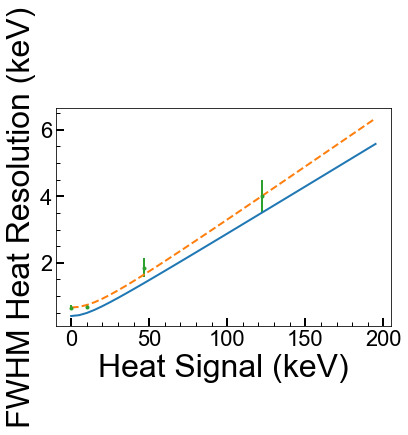

In [5]:
# plot the heat resolution, reproduce fig 2d from 2004 NIMA Edelweiss paper
E_vec = np.arange(0,200,5)
table, = plt.plot(E_vec, 2.355*heatRes_GGAl10(E_vec), label='Resolution (table)')
plot, = plt.plot(E_vec, 2.355*heatRes_GGAl10_guard(E_vec), linestyle='--', label='Resolution (plot)')
data = plt.errorbar((heatRes_data.Energy).tolist(), (heatRes_data.FWHM).tolist(), yerr=(heatRes_data.error).tolist(), fmt='.', label='Guard-event resolution')
plt.xlabel("Heat Signal (keV)")
plt.ylabel("FWHM Heat Resolution (keV)")
#plt.legend(handles=[table, plot, data])
plt.show()

In [6]:
#start getting the resolutions
import EdwRes as er

aH=0.035
FWHM_to_SIG = 1 / (2*np.sqrt(2*np.log(2)))
heatRes_GGA110 = er.get_heatRes_func(0.4, 3.5)

sigI_GGA110 = er.get_ionRes_func(1.1, 1.3, 3.0)

heatRes_GGA3 = er.get_heatRes_func(0.4, 2.7,aH*FWHM_to_SIG)

sigI_GGA3 = er.get_ionRes_func(1.3, 1.5, 3.1)

sigh_GGA110v = np.vectorize(heatRes_GGA110)
sigi_GGA110v = np.vectorize(sigI_GGA110)
sigh_GGA3v = np.vectorize(heatRes_GGA3)
sigi_GGA3v = np.vectorize(sigI_GGA3)

GGA3/NR/4.0/5.556E-02/0.0380/000/0.1493/0.1782/0.9975/
GGA3/NR/4.0/5.556E-02/0.0381/000/0.1537/0.1703/0.9948/
0.5951020408163266


/var/folders/3s/rw_tcb5d5nb73w4p_52qbr640000gn/T/ipykernel_26156/1227822202.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ymin,ymax)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


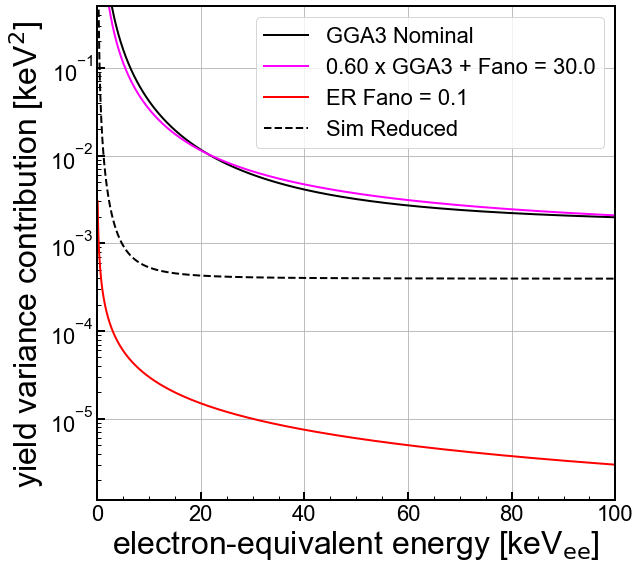

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(0.1,100,0.1)

import prob_dist as pd

prefactor = (1 + 4.0/3.0)**2/X**2
fpre = 1/X**2
reduce = ((1 + (0.6*4.0/3.0))/(1 + (4.0/3.0)))**2
print(reduce)

#ax1.plot(X,prefactor*sigh_GGA3v(X)**2,color='orange',linestyle='--',label='GGA3 Heat Resolution')
#ax1.plot(X,prefactor*sigi_GGA3v(X)**2,color='steelblue',linestyle='--',label='GGA3 Ionization Resolution')
ax1.plot(X,prefactor*sigh_GGA3v(X)**2+prefactor*sigi_GGA3v(X)**2,color='k',linestyle='-',label='GGA3 Nominal')
#ax1.plot(X,reduce*prefactor*sigh_GGA3v(X)**2+reduce*prefactor*sigi_GGA3v(X)**2,color='steelblue',linestyle='-',label='GGA3 Inst. Res.')
ax1.plot(X,reduce*prefactor*sigh_GGA3v(X)**2+reduce*prefactor*sigi_GGA3v(X)**2+fpre*3e-3*30.0*X,color='magenta',linestyle='-',label='{:1.2f} x GGA3 + Fano = 30.0'.format(reduce))
#ax1.plot(X,fpre*3e-3*1.0*X,color='green',linestyle='-',label='ER Fano = 1.0')
ax1.plot(X,fpre*3e-3*0.1*X,color='red',linestyle='-',label='ER Fano = 0.1')
sig0=0.05
bER=0.02
bER_conv = bER*FWHM_to_SIG
#ax1.plot(X,prefactor*sig0**2+prefactor*bER_conv**2*X**2,color='k',linestyle='--',label='Sim Nominal')
ax1.plot(X,pd.series_ERQ_var_gen(X,sig0=sig0,F=0.0,b=0.02,V=4.0),color='k',linestyle='--',label='Sim Reduced')

#print(prefactor*3e-3*1.0*X)

#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)

ymin = 0
ymax = 0.5

ax1.set_yscale('log')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 100) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'electron-equivalent energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('yield variance contribution [keV$^2$]')
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.savefig('paper_figures/Variance_and_ERFano.eps')
plt.savefig('paper_figures/Variance_and_ERFano.pdf')
plt.show()